# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
display(temp)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
display(temp.dtypes)

City            object
State           object
Temperature    float64
dtype: object

For **City** and **State** we have object type. This is common for string based data<br>
For **Temperature** attribute we have float64. Commmon in data for high precision analysis<br>

#### Select the rows where state is New York

In [5]:
# your answer here
temp[temp.State=='New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
temp[temp.State=='New York'].agg({'Temperature':'mean'})

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp[temp.Temperature>15][['City','State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp[temp.Temperature>15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
condition=(temp.Temperature>15) & (temp.Temperature<20)
display(temp[condition]['City'])

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
display(temp.groupby('State').agg({'Temperature':['mean','std']}))

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `Employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
employee=pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
display(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

For **`Name`**, **`Department`**, **`Education`**, **`Gender`**, and **`Title`** we have object type. This is common for string based data<br>
For **`Years`**, and **`Salary`** attributes we have int64. Commmon in data that not expect to be precise<br>

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

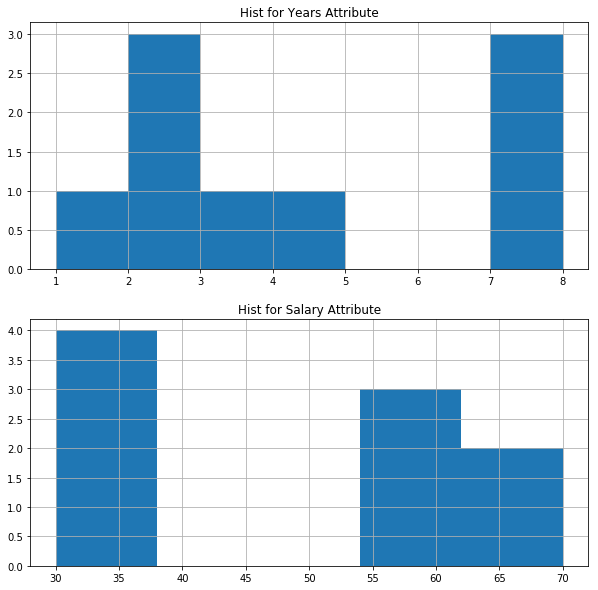

In [13]:
# your answer here
num_ob=2 # Attributes to plot hist
collis=employee.columns.tolist()
fig=plt.figure(figsize=(10,num_ob*5))
    
ax=fig.add_subplot(211)
ax.hist(employee['Years'],bins=(max(employee['Years'])-min(employee['Years'])))
ax.grid()
ax.set_title('Hist for Years Attribute')

ax=fig.add_subplot(212)
ax.hist(employee['Salary'],bins=5)
ax.grid()
ax.set_title('Hist for Salary Attribute')

plt.show()

#### What's the average salary in this company?

In [14]:
# your answer here
print(round(employee['Salary'].mean(),2))

48.89


#### What's the highest salary?

In [15]:
# your answer here
print(max(employee['Salary']))

70


#### What's the lowest salary?

In [16]:
# your answer here
print(min(employee['Salary']))

30


#### Who are the employees with the lowest salary?

In [17]:
# your answer here
print(employee[employee['Salary']==max(employee['Salary'])])

     Name Department Education Gender Title  Years  Salary
6  Carlos         IT    Master      M    VP      8      70
8     Ana         HR    Master      F    VP      8      70


#### Could you give all the information about an employee called David?

In [18]:
# your answer here
print(employee.loc[employee['Name']=='David'])
display(employee[employee['Name']=='David'])

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
# your answer here
print(employee.loc[employee['Name']=='David']['Salary'])

2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [20]:
# your answer here
print(employee.loc[employee['Title']=='associate'])
display(employee[employee['Title']=='associate'])

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
display(employee.head(3))

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
display(employee[:3])

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
# your answer here
condition=(employee['Title']=='associate') & (employee['Salary']>55)
display(employee.loc[condition])
print('')
print('Employee Name: ',employee.loc[condition]['Name'].values[0])

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60



Employee Name:  Pedro


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here
employee.groupby('Years').agg({'Salary':'mean'})

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [25]:
# your answer here
employee.groupby('Title').agg({'Salary':'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

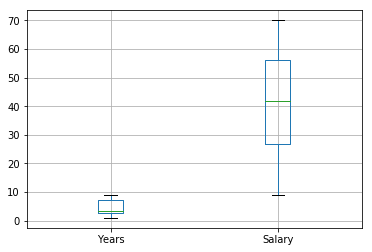

In [26]:
# draw boxplot here
employee.describe().boxplot()

In [27]:
# print first quartile here
employee.describe().loc['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [28]:
# print third quartile here
employee.describe().loc['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [29]:
# your answer here
employee.groupby('Gender').agg({'Salary':'mean'})

,Salary
Gender,
F,47.5
M,50.0


Yes, it is different. Males earns 2.5 more than Women

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here
dep=employee.groupby('Department').agg({'Years':['min','mean','max'],'Salary':['min','mean','max']})
dep.columns=dep.columns.droplevel()
dep.columns=['years.'+item for item in dep.columns[:3]]+['salary.'+item for item in dep.columns[3:]]
display(dep)

,years.min,years.mean,years.max,salary.min,salary.mean,salary.max
Department,,,,,,
HR,2,4.666667,8,30,45.00,70
IT,1,4.500000,8,30,48.75,70
Sales,2,2.500000,3,55,55.00,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here
print('Years Difference for lambda and apply: ')
display(employee.groupby('Department')['Years'].apply(lambda x: x.max()-x.min()))
print('')
print('-------------------')
print('')
print('Years Difference for agg: ')
agg_y=employee.groupby('Department')['Years'].agg(['min','max'])
display(agg_y['max']-agg_y['min'])
print('')
print('-------------------')
print('')
print('Salary Difference for lambda and apply: ')
display(employee.groupby('Department')['Salary'].apply(lambda x: x.max()-x.min()))
print('')
print('-------------------')
print('')
agg_s=employee.groupby('Department')['Salary'].agg(['min','max'])
display(agg_s['max']-agg_s['min'])

Years Difference for lambda and apply: 


Department
HR       6
IT       7
Sales    1
Name: Years, dtype: int64


-------------------

Years Difference for agg: 


Department
HR       6
IT       7
Sales    1
dtype: int64


-------------------

Salary Difference for lambda and apply: 


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64


-------------------



Department
HR       40
IT       40
Sales     0
dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
# your answer here
# unzip Orders.zip to decompress and obtain Orders.csv
orders=pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [33]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [34]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


Many kinds of columns types. Unnamed: 0 seems to be the id of the dataset. We could easily skip it if we know the total number of columns in step 0. Why skipping it? Because it shares the same values as the index

####  What is the average Purchase Price?

In [35]:
# your answer here
print(orders['UnitPrice'].mean())

3.1161744805540756


#### What were the highest and lowest purchase prices? 

In [36]:
# your answer here
print('Max: ',orders['UnitPrice'].max())

Max:  8142.75


In [37]:
# your answer here
print('Min: ',orders['UnitPrice'].min())

Min:  0.0


#### Select all the customers we have in Spain

In [38]:
# your answer here
print(orders.loc[orders['Country']=='Spain']['CustomerID'].head(10))

4250     12557
4251     12557
4252     12557
4253     12557
4254     12557
13974    17097
13975    17097
13976    17097
13977    17097
13978    17097
Name: CustomerID, dtype: int64


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [39]:
# your answer here
print('number of different customers: ',len(set(orders.loc[orders['Country']=='Spain']['CustomerID'])))
print(orders.loc[orders['Country']=='Spain']['CustomerID'].value_counts().head(10))

number of different customers:  30
12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
Name: CustomerID, dtype: int64


#### Select all the customers who have bought more than 50 items ?

In [40]:
# your answer here
ordsbycust=orders.groupby('CustomerID').agg({'Quantity':'sum'})
print('Number of costumers: ',len(ordsbycust[ordsbycust>50]))
display(ordsbycust[ordsbycust>50].head(10))

Number of costumers:  4339


,Quantity
CustomerID,
12346,74215.0
12347,2458.0
12348,2341.0
12349,631.0
12350,197.0
12352,536.0
12353,NaN
12354,530.0
12355,240.0


#### Select orders from Spain that are above 50 items

In [41]:
# your answer here
ordsbycust=orders[orders['Country']=='Spain'].groupby('CustomerID').agg({'Quantity':'sum'})
print('Number of costumers: ',len(ordsbycust[ordsbycust>50]))
display(ordsbycust[ordsbycust>50].head(10))

Number of costumers:  30


,Quantity
CustomerID,
12354,530.0
12417,267.0
12421,484.0
12442,182.0
12445,62.0
12448,243.0
12450,128.0
12454,1006.0
12455,566.0


#### Select all free orders

In [42]:
# your answer here
print(len(orders[orders['amount_spent']==0]))
display(orders[orders['amount_spent']==0].head(10))

40


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [43]:
# your answer here
df_lunch=orders[pd.Series([True if 'lunch bag' in item else False for item in orders['Description']])]
print('Number of orders for lunch bag: ',len(df_lunch))
display(df_lunch.head(10))

Number of orders for lunch bag:  11556


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
361,370,536401,20726,2010,12,3,11,lunch bag woodland,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
362,371,536401,22384,2010,12,3,11,lunch bag pink polkadot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
402,411,536404,22383,2010,12,3,11,lunch bag suki design,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
403,412,536404,20728,2010,12,3,11,lunch bag cars blue,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
404,413,536404,20727,2010,12,3,11,lunch bag black skull.,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [44]:
# your answer here
df_lunch_2011=df_lunch[df_lunch['year']==2011]
print('Number of lunch bag oders for 2011: ',len(df_lunch_2011))
display(df_lunch_2011.head(10))

Number of lunch bag oders for 2011:  11234


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26861,43617,540098,22383,2011,1,2,15,lunch bag suki design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26862,43618,540098,22382,2011,1,2,15,lunch bag spaceboy design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26863,43619,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26864,43620,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26902,43658,540099,20725,2011,1,2,16,lunch bag red retrospot,10,2011-01-04 16:41:00,1.65,15808,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f418d1de160>]],
      dtype=object)

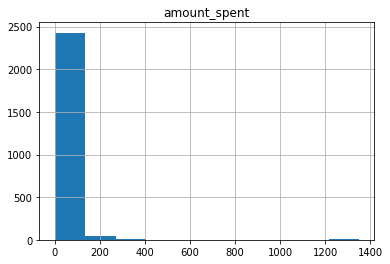

In [45]:
# your answer here
orders[orders['Country']=='Spain'].hist('amount_spent')

#### Select all orders made in the month of August

In [46]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [47]:
# your answer here
display(orders[orders['month']==8]['Country'].value_counts())

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [48]:
# your answer here
display(orders.groupby('Country').agg({'amount_spent':'mean'}).sort_values('amount_spent',ascending=False))

,amount_spent
Country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.687745


#### What's the most expensive item?

In [49]:
# your answer here
print('Most expensive item: ',orders.loc[orders['UnitPrice']==max(orders['UnitPrice'])]['Description'].values[0])

Most expensive item:  postage


#### What was the average amount spent per year ?

In [50]:
# your answer here
display(orders.groupby('year').agg({'amount_spent':'mean'}))

,amount_spent
year,
2010,21.892733
2011,22.430074


___